# Evaluation of models predicting the electricity prices

Run [SARIMA](SARIMA.ipynb), [SARIMAX](SARIMAX.ipynb), and [LSTM](LSTMmodel.ipynb) models to predict the electricity prices and save forecasts as numpy arrays before running this notebook.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from modelling import *
%load_ext autoreload
%autoreload 2

## Loading the data

In [2]:
# path to numpy files
sarima = 'output/forecast_sarima.npy'
sarimax = 'output/forecast_sarimax.npy'
lstm = 'output/forecast_LSTM.npy'
data = '../../data/fulldata.csv'

# load numpy files
sarima_forecast = np.load(sarima)
sarimax_forecast = np.load(sarimax)
lstm_forecast = np.load(lstm)

# load test data and create naive forecast
data = pd.read_csv(data)
data = data[['SpotPrice', 'from']]
data['from'] = pd.to_datetime(data['from'])
data = data.set_index('from')
data.sort_index(inplace=True)

# naive forecast
naive = data.shift(24)['SpotPrice'].values

# drop old data
naive = naive[data.index >= '2024-08-01']
data = data[data.index >= '2024-08-01']

# create np series
actuals = data['SpotPrice'].values

# create timestamps for plotting
timestamps = data.index.values
timestamps = pd.to_datetime(timestamps)

In [3]:
# creating table with results
models = ["Naive", "SARIMA", "SARIMAX", "LSTM"]
metrics = {
    "RMSE": [root_mean_squared_error(actuals, naive), 
             root_mean_squared_error(actuals, sarima_forecast), 
             root_mean_squared_error(actuals, sarimax_forecast), 
             root_mean_squared_error(actuals, lstm_forecast)],
    "MAE": [mean_absolute_error(actuals, naive), 
            mean_absolute_error(actuals, sarima_forecast), 
            mean_absolute_error(actuals, sarimax_forecast), 
            mean_absolute_error(actuals, lstm_forecast)]
}

table = latex_table(models, metrics)

with open('output/results.tex', 'w') as f:
    f.write(table)


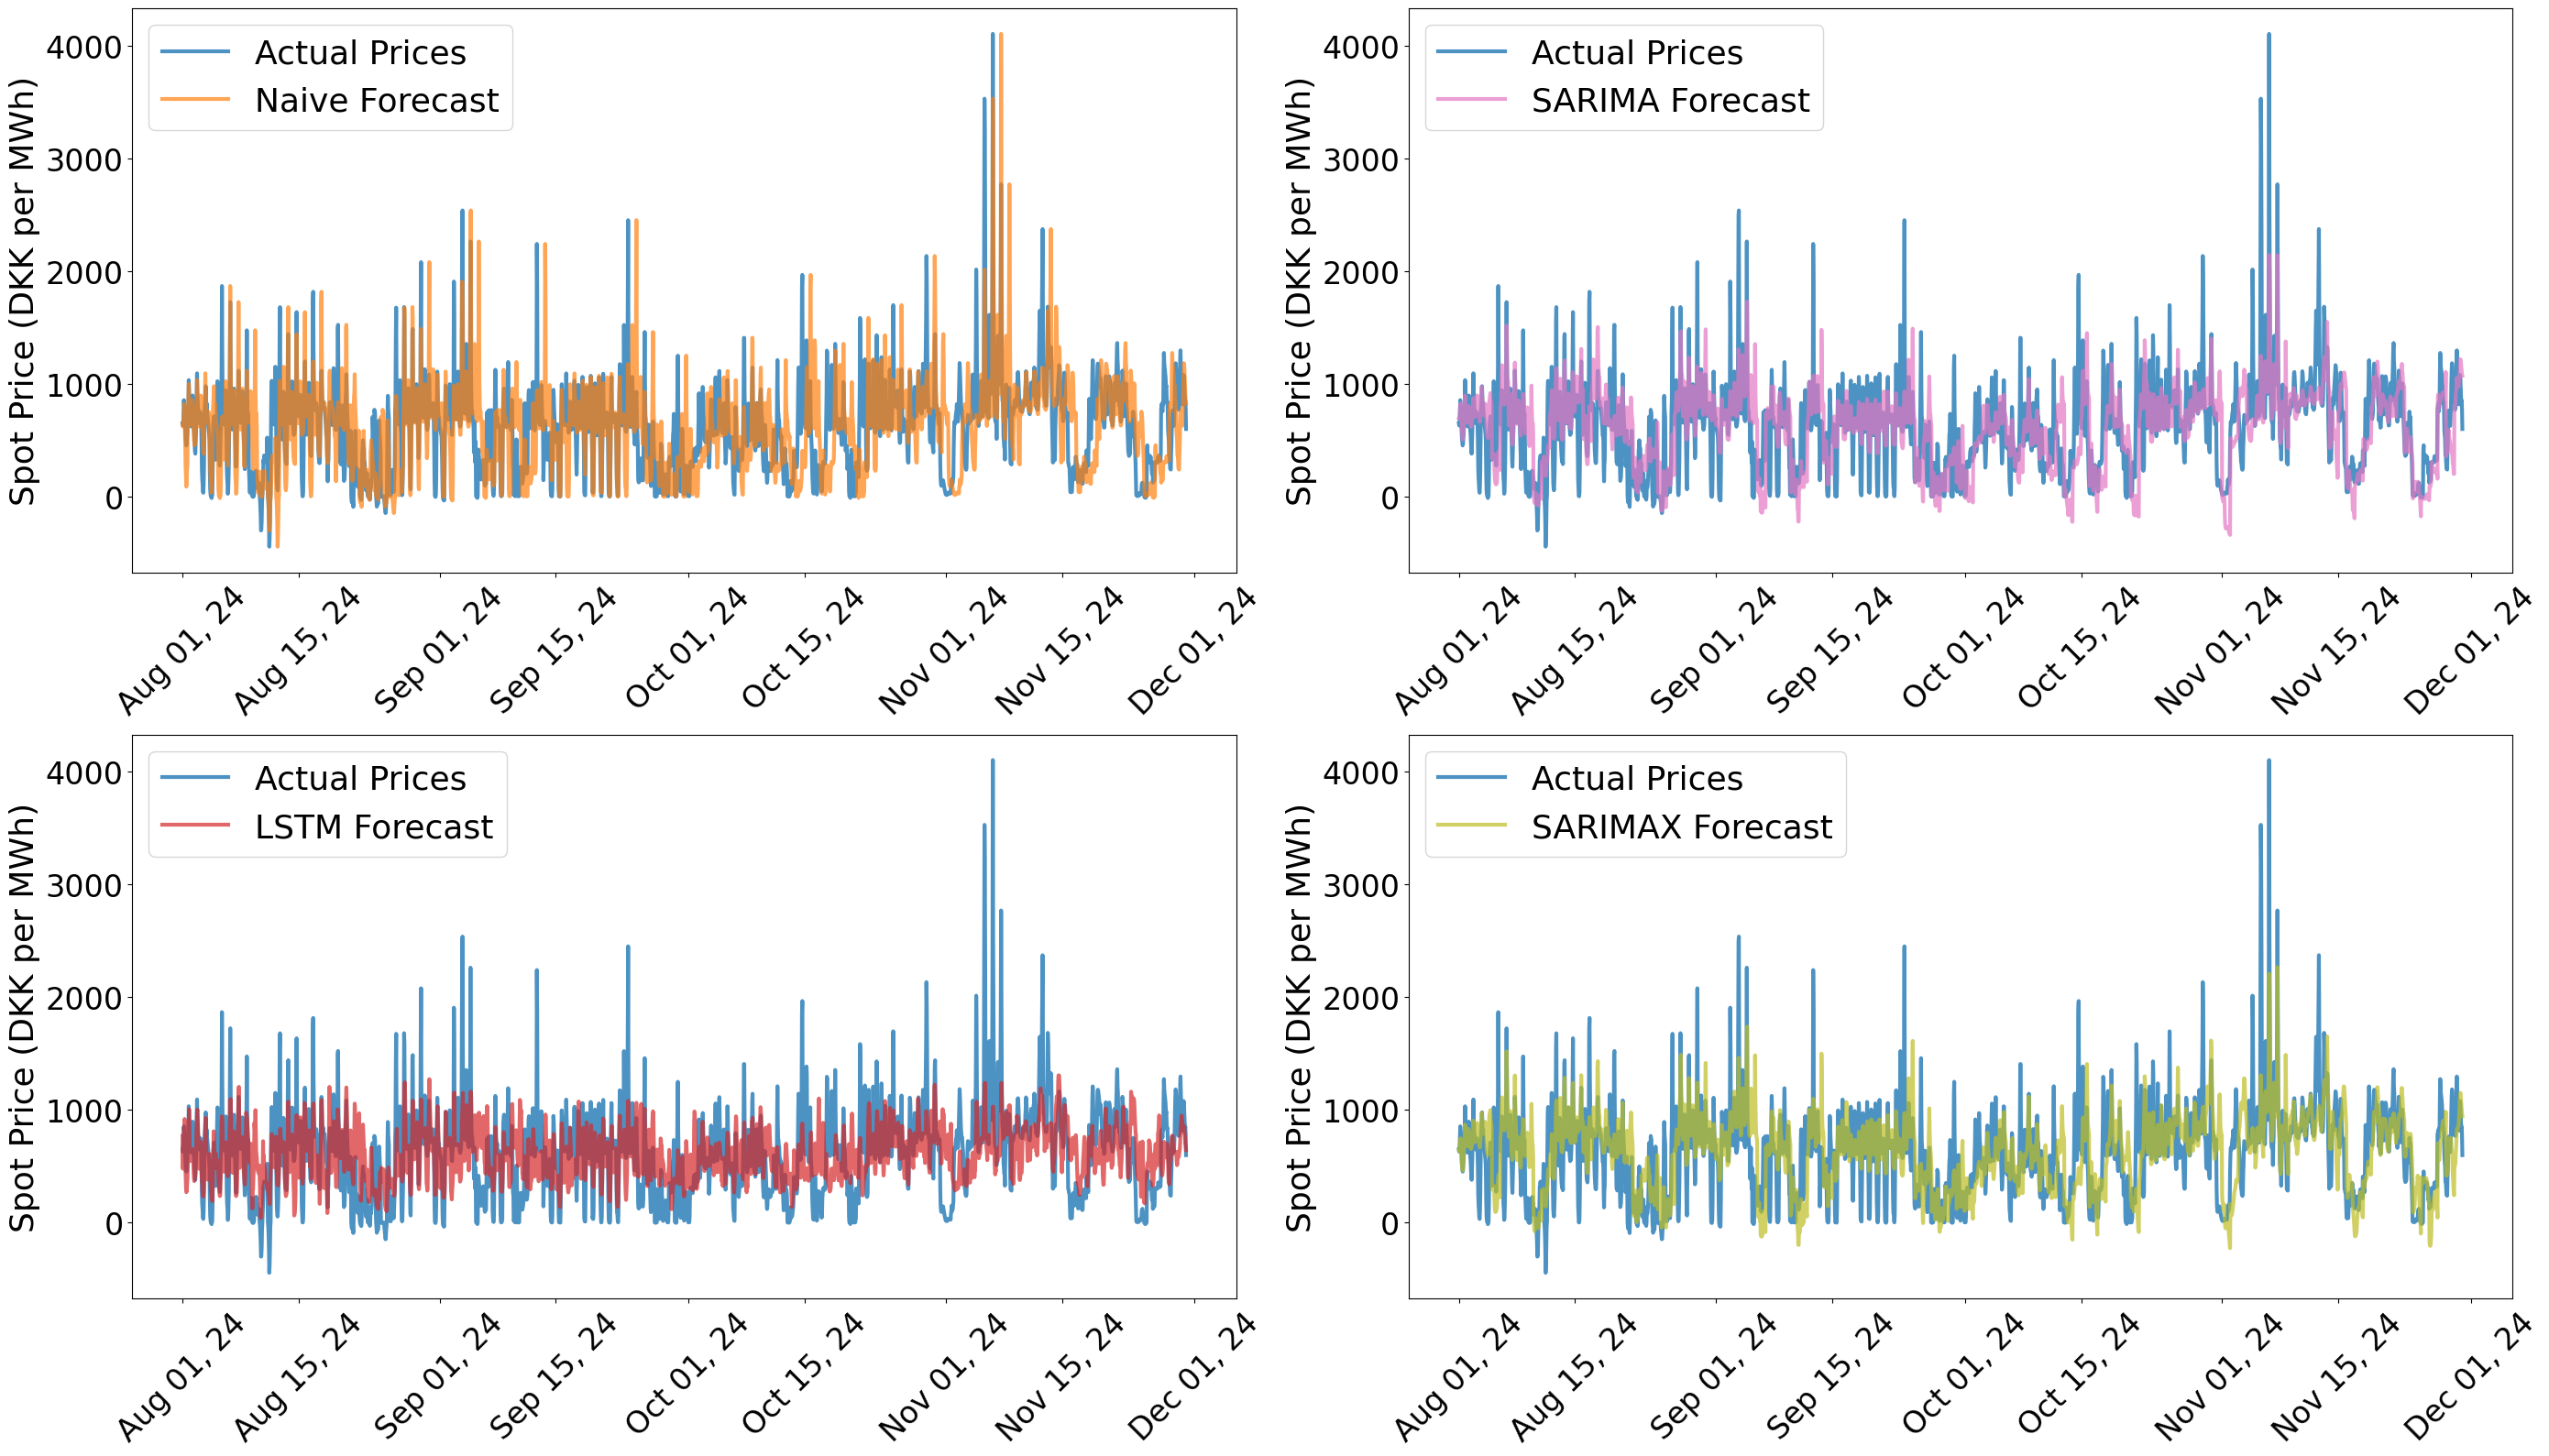

In [4]:
# Ensure timestamps are datetime
timestamps = pd.to_datetime(timestamps)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(28, 16))

# Define models and their labels/colors
models = [
    ("Naive Forecast", naive, '#ff7f0e'),
    ("SARIMA Forecast", sarima_forecast, '#e377c2'),
    ("LSTM Forecast", lstm_forecast, '#d62728'),
    ("SARIMAX Forecast", sarimax_forecast, '#bcbd22'),
]

# Plot each model on its own subplot
for ax, (label, model, color) in zip(axs.flat, models):
    ax.plot(timestamps, actuals, label='Actual Prices', color='#1f77b4', alpha=0.8, linewidth=3)
    ax.plot(timestamps, model, label=label, color = color, alpha=0.7, linewidth=3)
    ax.set_ylabel('Spot Price (DKK per MWh)', fontsize=26)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.legend(fontsize=26)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d, %y"))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save and show the plot
plt.savefig('output/predicted_v_actuals_full.png')
plt.show()


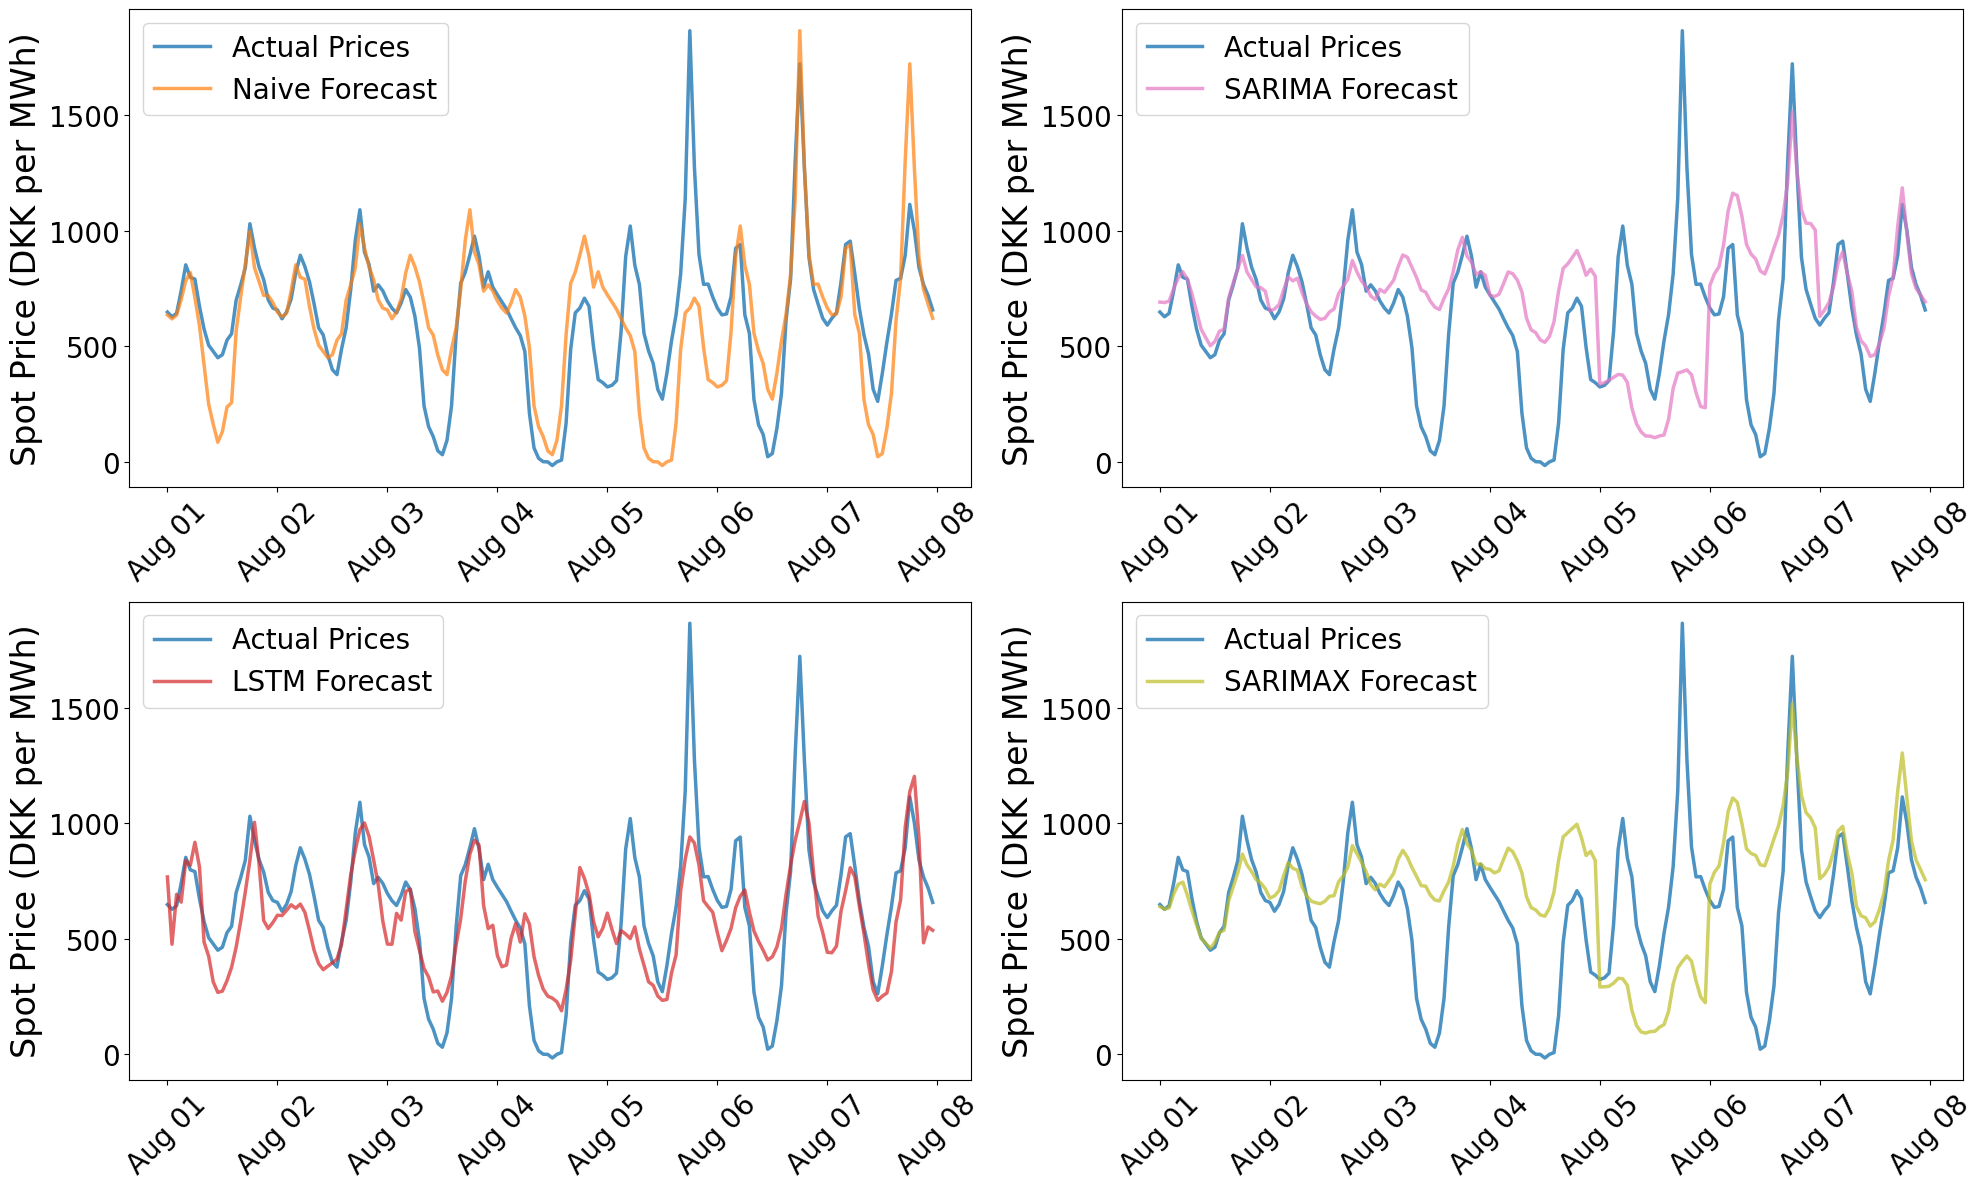

In [5]:
plot_forecasts(
    timestamps=timestamps,
    actuals=actuals,
    naive=naive,
    sarima_forecast=sarima_forecast,
    sarimax_forecast=sarimax_forecast,
    lstm_forecast=lstm_forecast,
    start_datetime="2024-08-01 00:00",
    end_datetime="2024-08-8 00:00",
    output_path="output/1stweek_forecasts.png",
    display_plot=True
)


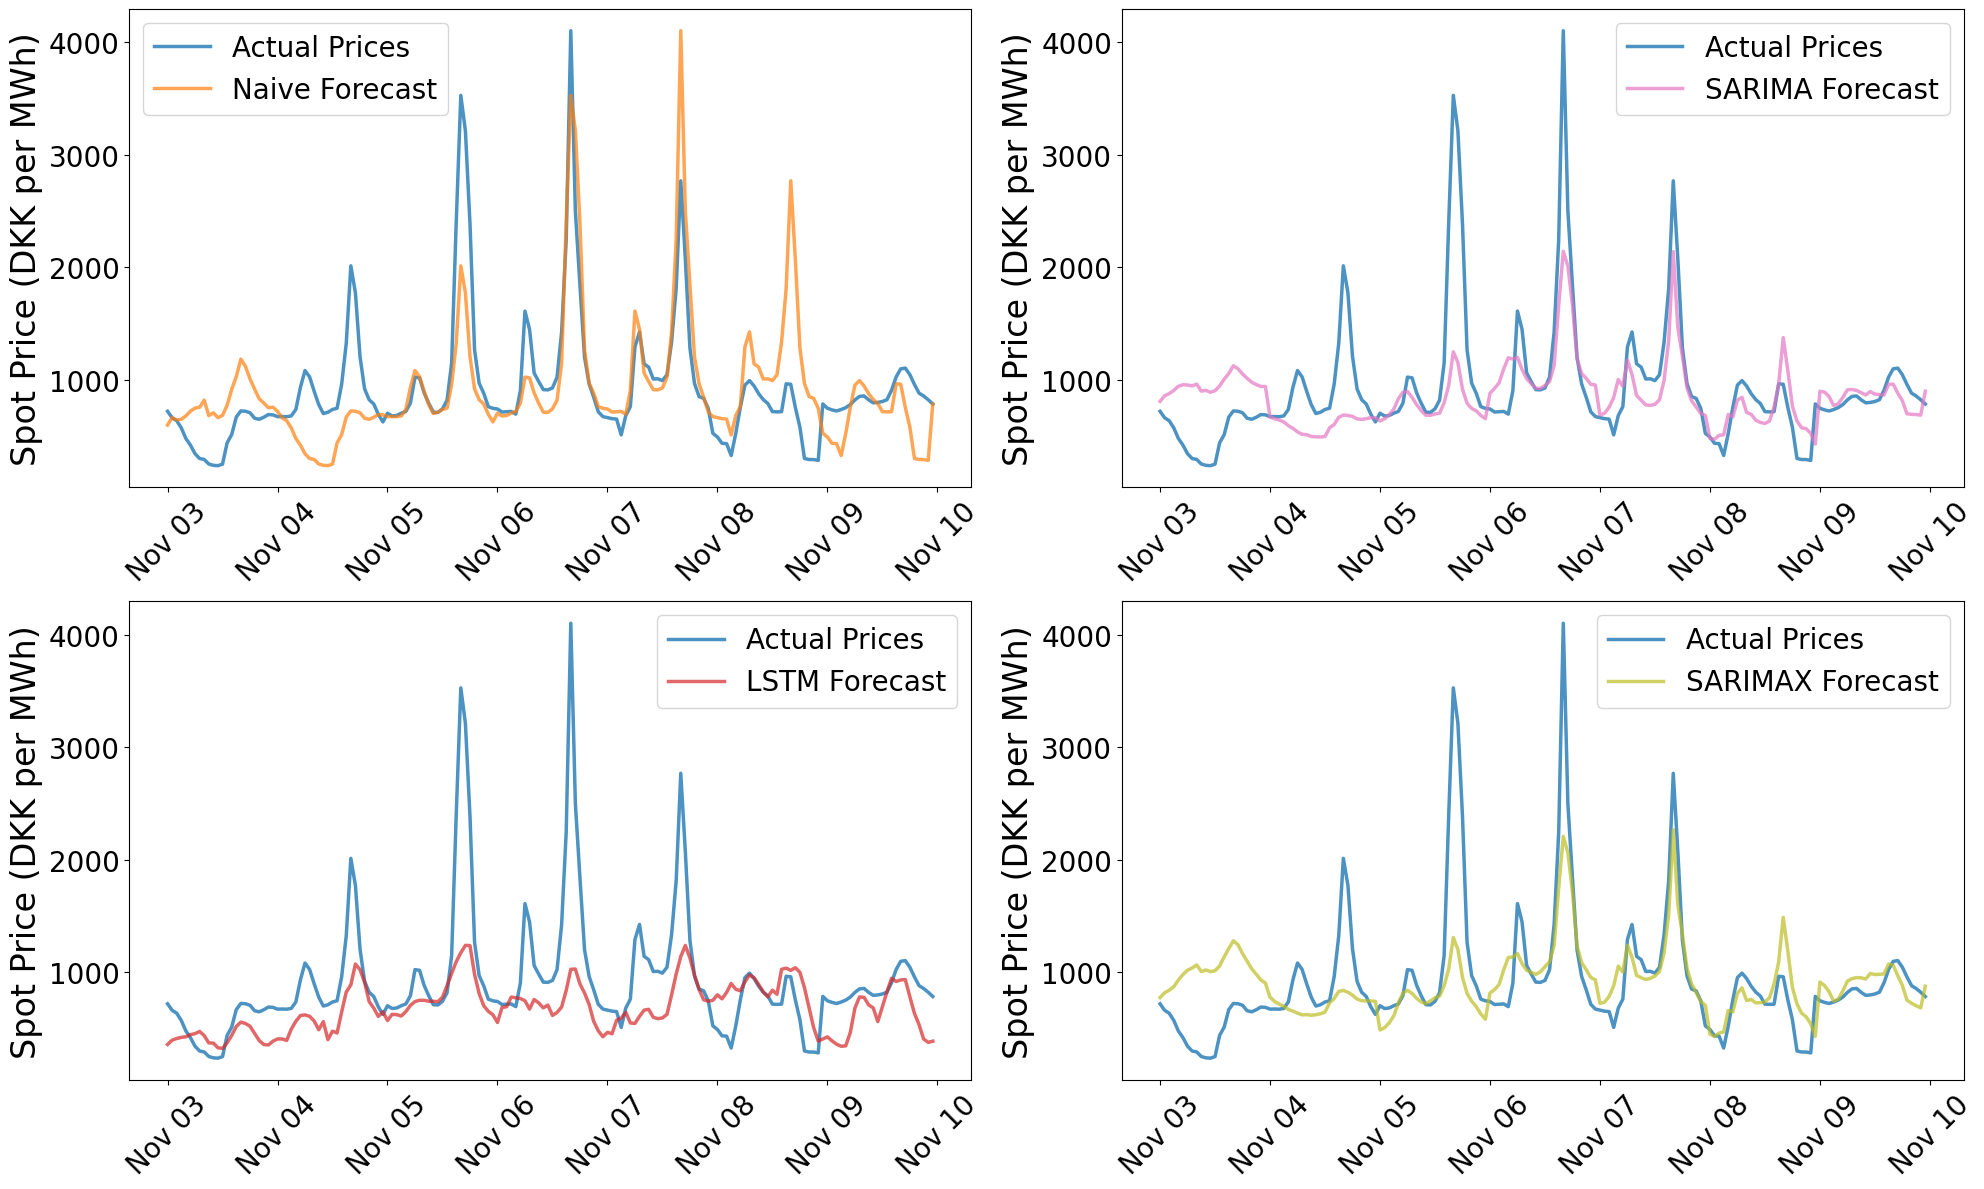

In [6]:
plot_forecasts(
    timestamps=timestamps,
    actuals=actuals,
    naive=naive,
    sarima_forecast=sarima_forecast,
    sarimax_forecast=sarimax_forecast,
    lstm_forecast=lstm_forecast,
    start_datetime="2024-11-03 00:00",
    end_datetime="2024-11-10 00:00",
    output_path="output/difficult_forecasts.png",
    display_plot=True
)

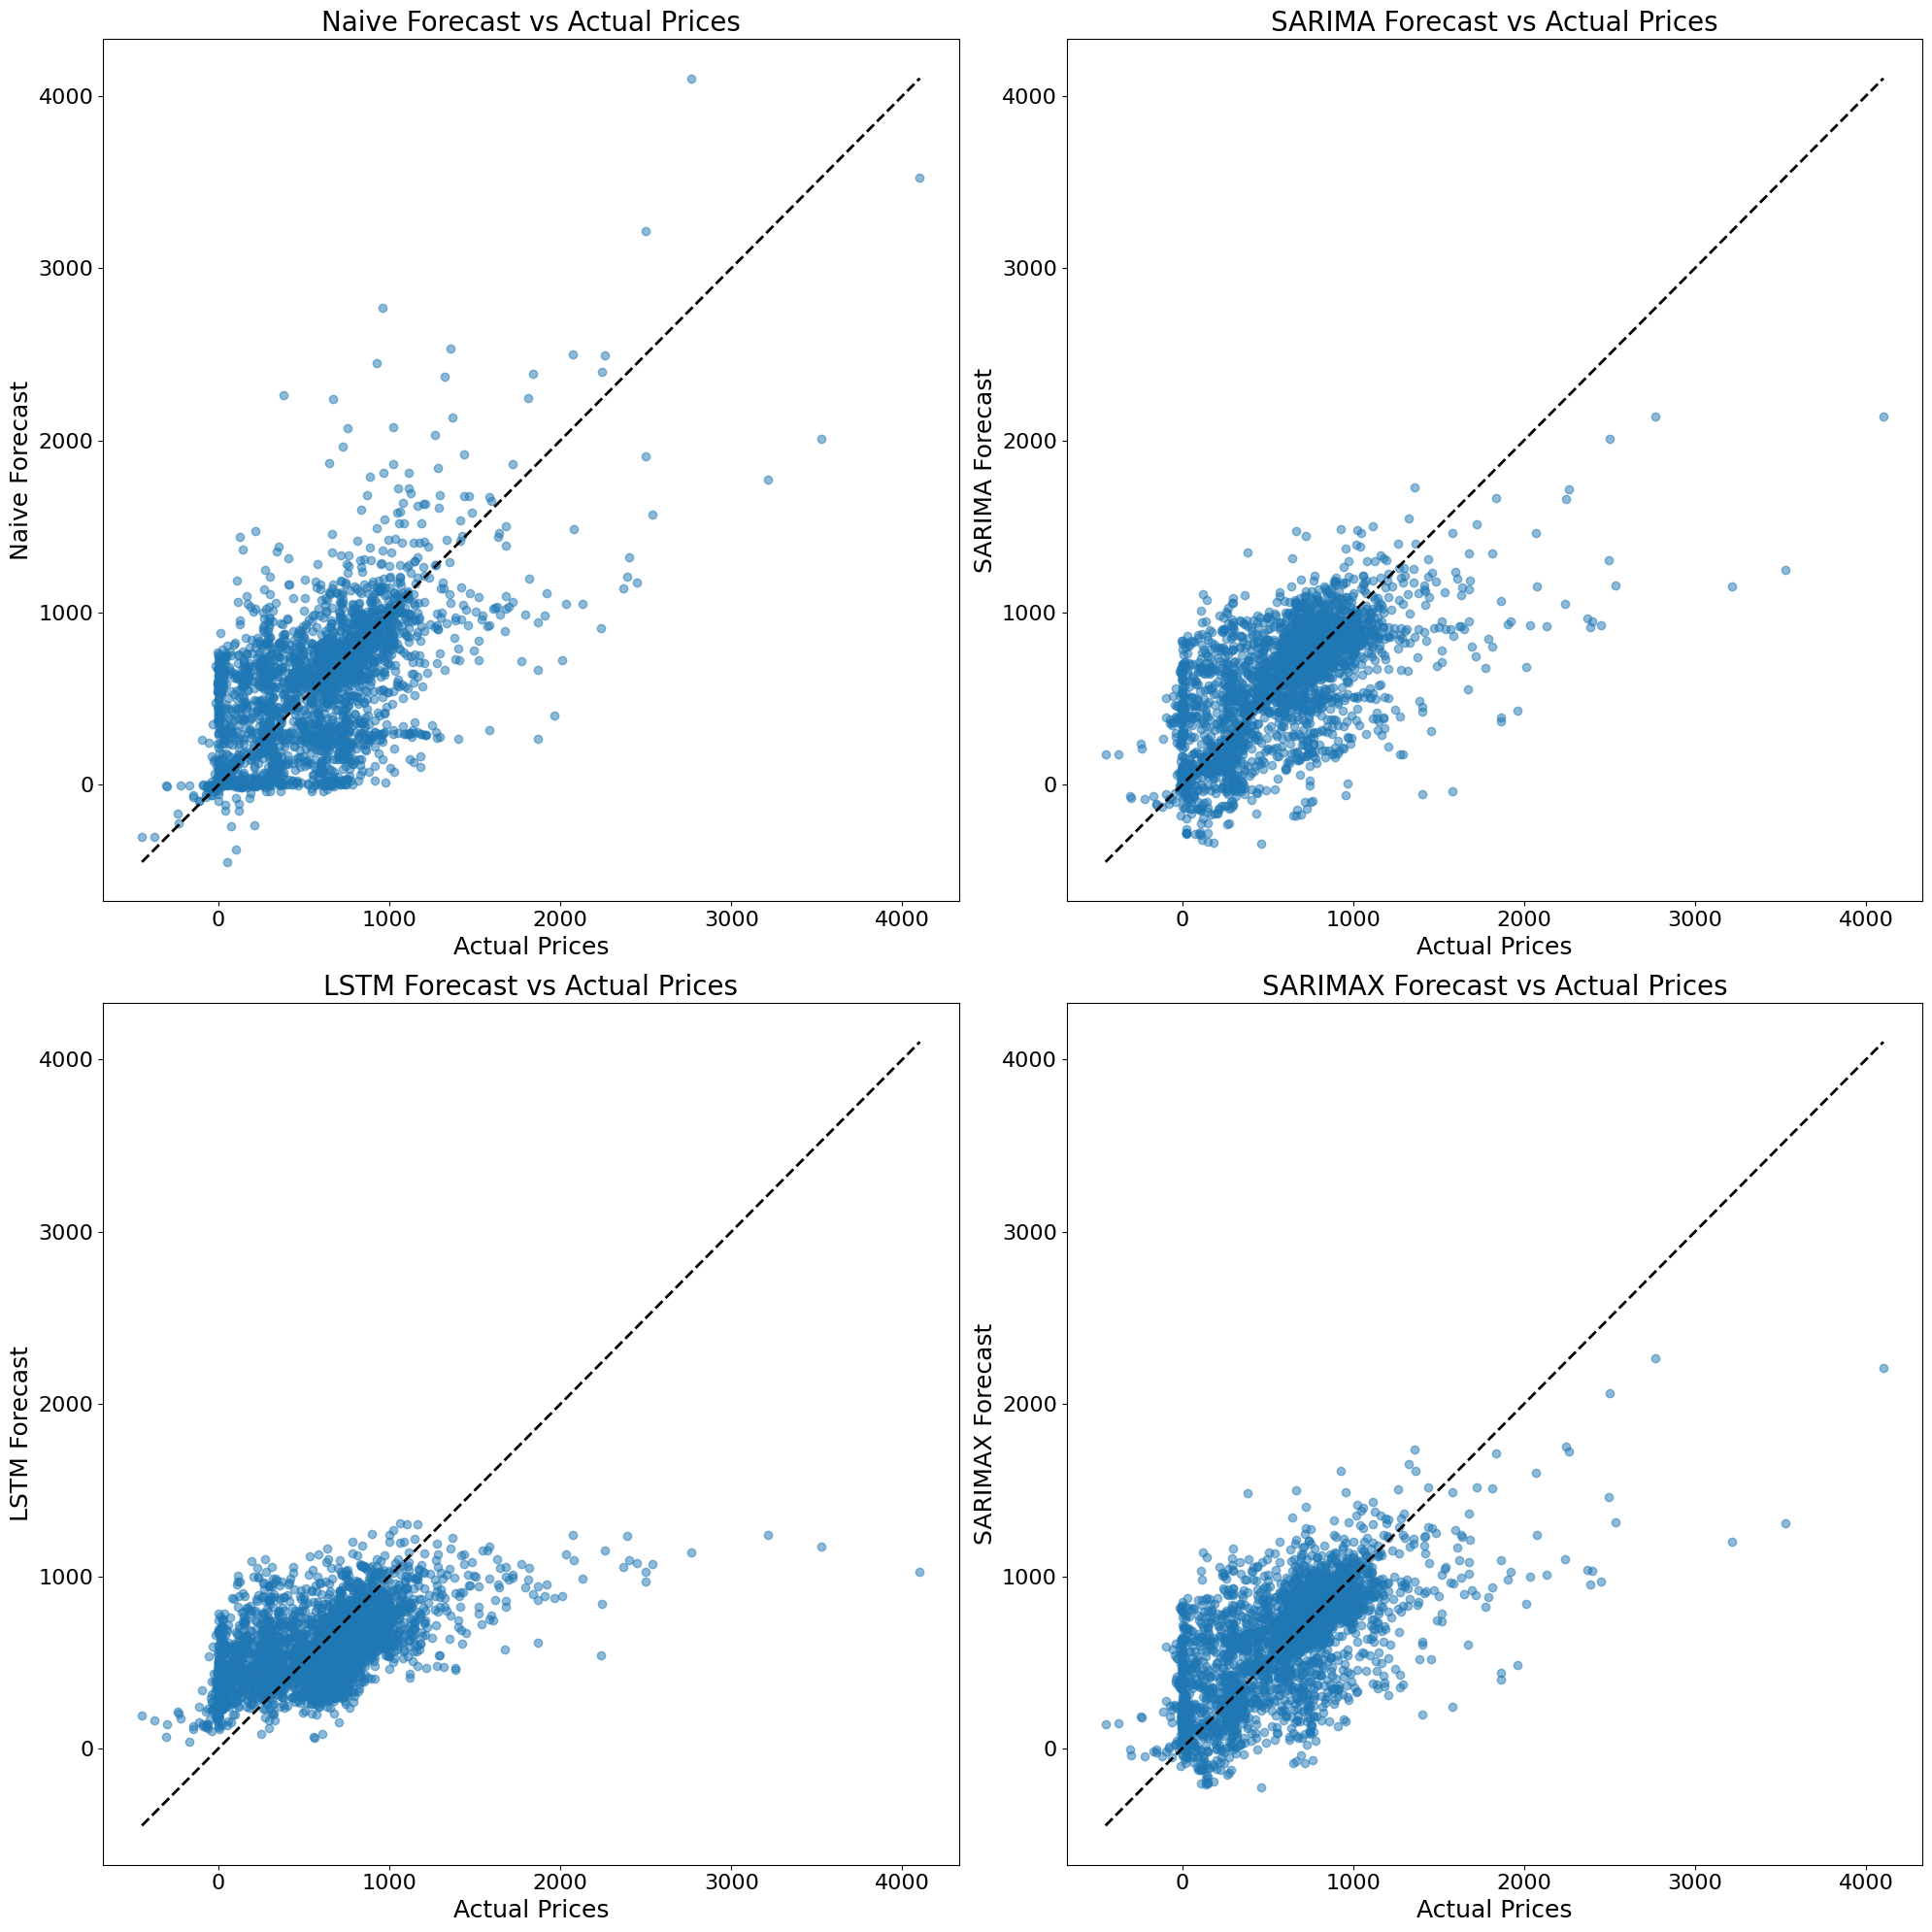

In [7]:
plot_forecast_scatter(
    actuals=actuals,
    naive=naive,
    sarima_forecast=sarima_forecast,
    sarimax_forecast=sarimax_forecast,
    lstm_forecast=lstm_forecast,
    output_path="output/forecast_scatter.png",
    display_plot=True
)
